In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Load Dataset**

In [2]:
data ="/kaggle/input/us-accidents/US_Accidents_March23.csv"

In [3]:
df = pd.read_csv(data)
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


***Data Preparation and Cleaning***

In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
df.shape

(7728394, 46)

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
#MISSING PERCENTAGE VALUES PER COLUMN
missing_percentage = df.isna().sum().sort_values(ascending = False)/len(df)*100
missing_percentage

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [9]:
missing_percentage[missing_percentage !=0]

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64

<Axes: >

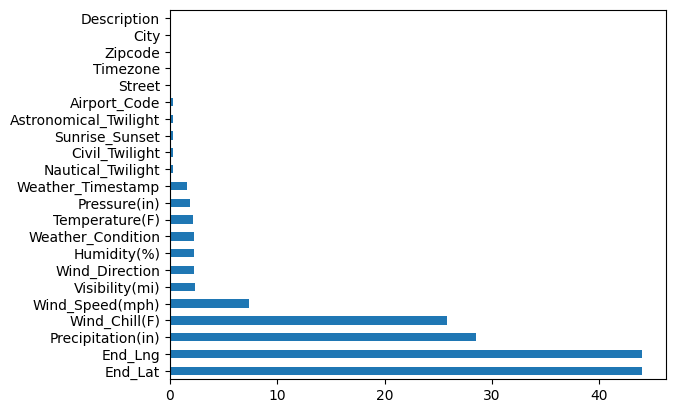

In [10]:
missing_percentage[missing_percentage !=0].plot(kind="barh")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [12]:
#importing libraries
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder

In [13]:
sample_size = 100000 

random_sample = df.sample(n=sample_size)

In [14]:
random_sample.columns = random_sample.columns.str.strip()
random_sample.columns = random_sample.columns.str.replace('(','_')
random_sample.columns = random_sample.columns.str.replace(')','')

In [15]:
random_sample.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance_mi', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature_F', 'Wind_Chill_F',
       'Humidity_%', 'Pressure_in', 'Visibility_mi', 'Wind_Direction',
       'Wind_Speed_mph', 'Precipitation_in', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [16]:
City_le = LabelEncoder()
County_le = LabelEncoder()
State_le = LabelEncoder()
Temperature_F_le = LabelEncoder()
Wind_Speed_mph_le = LabelEncoder()
Visibility_mi_le = LabelEncoder()
Junction_le = LabelEncoder()
No_Exit_le = LabelEncoder()
Traffic_Calming_le = LabelEncoder()
Traffic_Signal_le = LabelEncoder()

In [17]:
random_sample['City'] = City_le.fit_transform(random_sample['City'])
random_sample['County'] = County_le.fit_transform(random_sample['County'])
random_sample['State'] = State_le.fit_transform(random_sample['State'])
random_sample['Temperature_F'] = Temperature_F_le.fit_transform(random_sample['Temperature_F'])
random_sample['Wind_Speed_mph'] = Wind_Speed_mph_le.fit_transform(random_sample['Wind_Speed_mph'])
random_sample['Visibility_mi'] = Visibility_mi_le.fit_transform(random_sample['Visibility_mi'])
random_sample['Junction'] = Junction_le.fit_transform(random_sample['Junction'])
random_sample['No_Exit'] = No_Exit_le.fit_transform(random_sample['No_Exit'])
random_sample['Traffic_Calming'] = Traffic_Calming_le.fit_transform(random_sample['Traffic_Calming'])
random_sample['Traffic_Signal'] = Traffic_Signal_le.fit_transform(random_sample['Traffic_Signal'])

**Data Visiualization**

* In this part, we will visiualize some columns of the dataset to discover what are the most vital factors which cause car accidents.
* Our dataset revolves around four main sections:
1. Accidents location
2. Accidents time
3. Weather details
4. Road details

**1.Accidents Location**

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


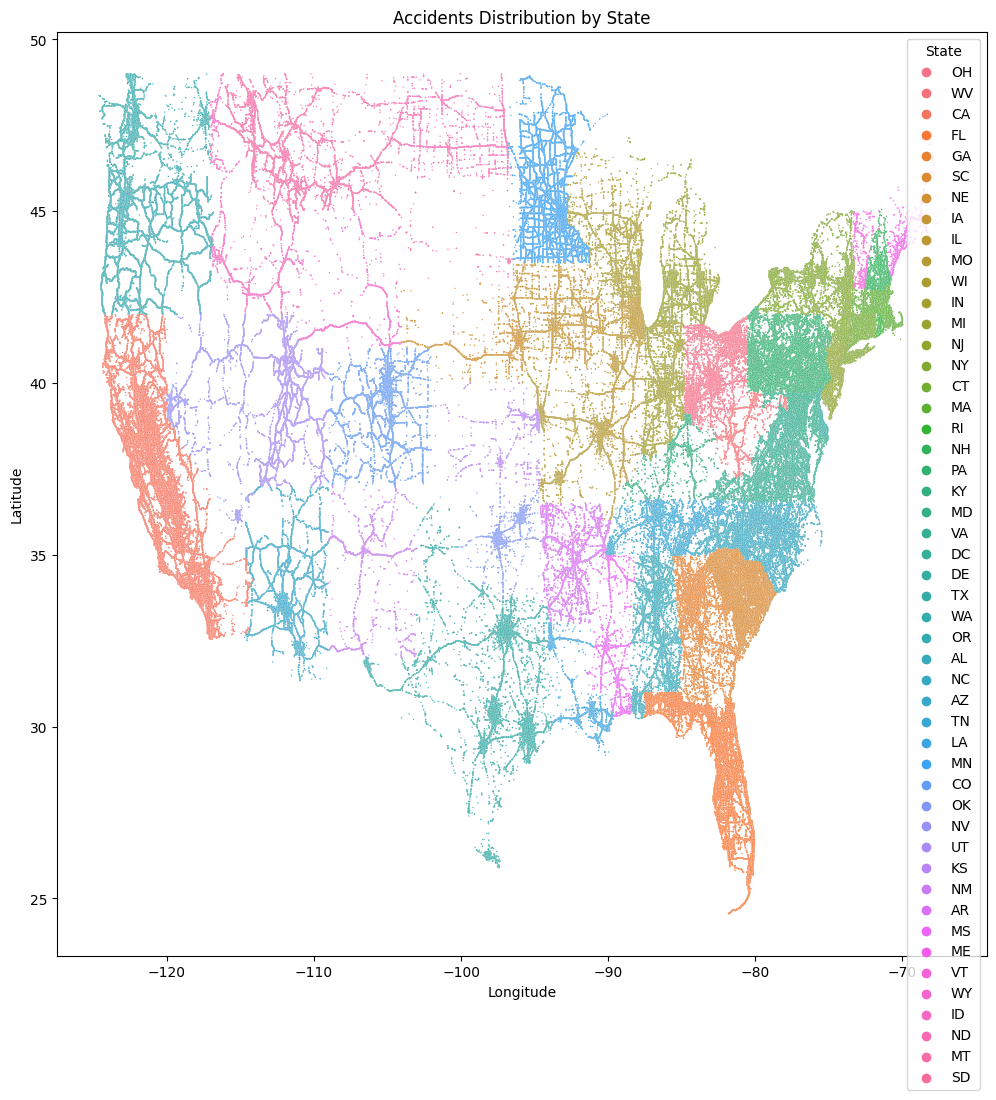

In [18]:
# Create a location scatter plot using Seaborn
plt.figure(figsize=(12, 12))
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, hue=df.State, s=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents Distribution by State')
plt.legend(title='State')

plt.show()

In [19]:
#city
cities = df.City.unique()
len(cities)

13679

In [20]:
cities_by_accident = df.City.value_counts()
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [21]:
cities_by_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

<Axes: ylabel='City'>

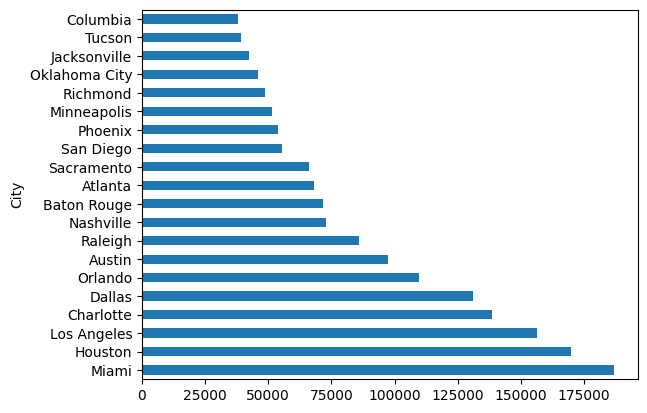

In [22]:
cities_by_accident[:20].plot(kind="barh")

/tmp/ipykernel_17/1791262746.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

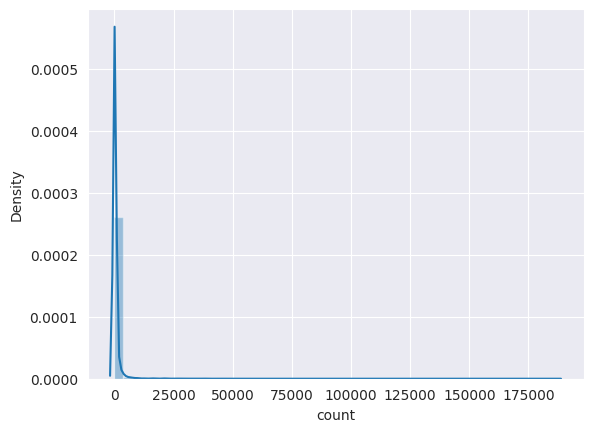

In [23]:
sns.set_style("darkgrid")
sns.distplot(cities_by_accident)

In [24]:
highest_cities_accident = cities_by_accident[cities_by_accident >= 1000]
len(highest_cities_accident)

1218

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


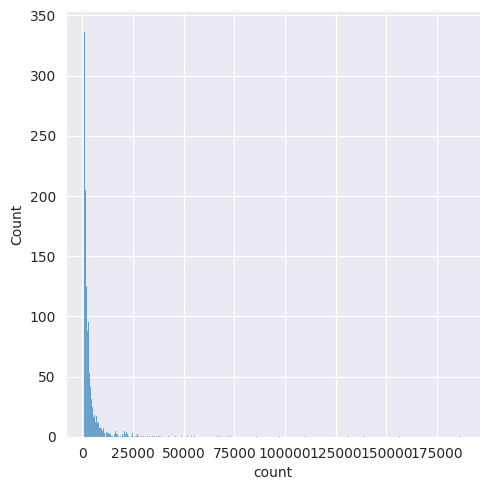

In [25]:
sns.displot(highest_cities_accident)

In [26]:
lowest_cities_accident = cities_by_accident[cities_by_accident<1000]
len(lowest_cities_accident)

12460

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


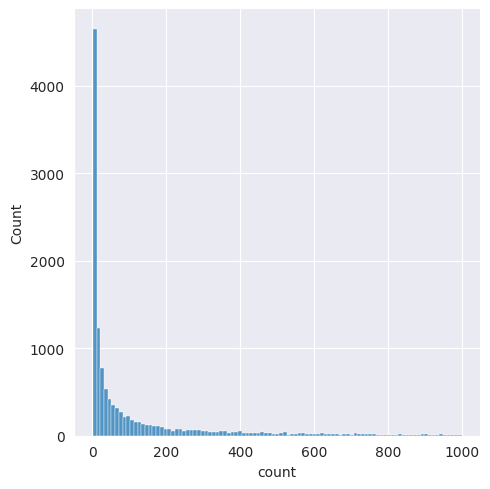

In [27]:
sns.displot(lowest_cities_accident)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

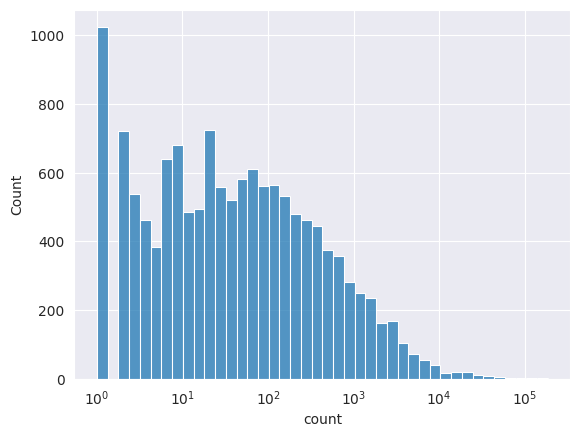

In [28]:
sns.histplot(cities_by_accident , log_scale=True)

In [29]:
cities_by_accident[cities_by_accident == 1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

**2.Accidents Time**

In [30]:
#start time
df['Start_Time'][0]

'2016-02-08 05:46:00'

In [31]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],format = '%Y-%m-%d %H:%M:%S' , errors ='coerce')

In [32]:
hour= df['Start_Time'].dt.hour

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


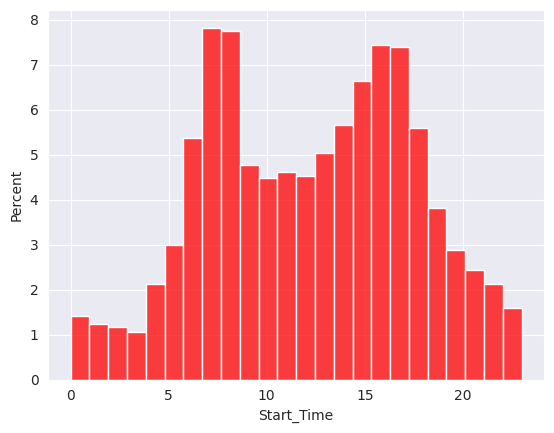

In [33]:
sns.histplot(hour, color='red',bins = 24 , stat='percent');

* Around 7 and 8 in morning there is a most spike in accident which might be due to office hours, college time etc.
* Next spike is Around 4 and 5 in evening which might be due to going back to home from office or Play hours for people.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


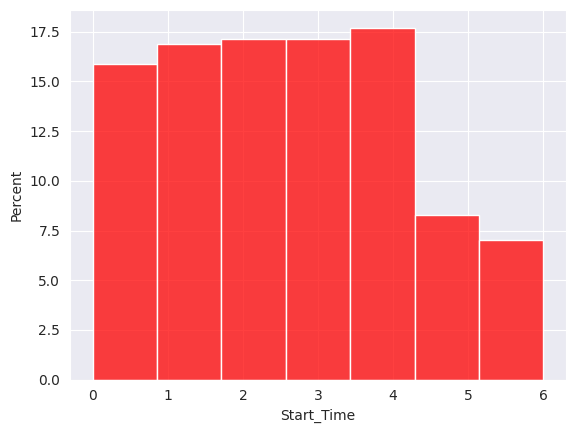

In [34]:
day_of_week =  df['Start_Time'].dt.dayofweek
sns.histplot(day_of_week, color='red', bins=7, stat='percent');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


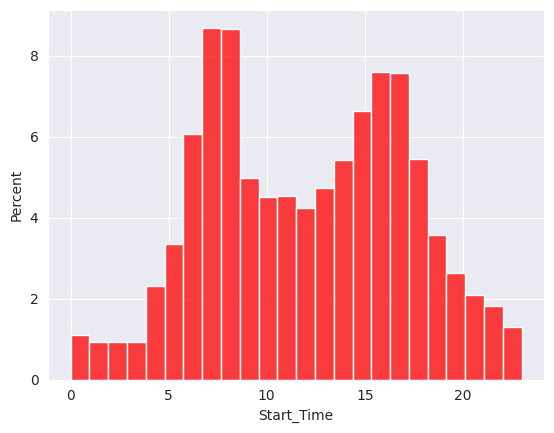

In [35]:
mondays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.hour, color='red', bins=24, stat='percent');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


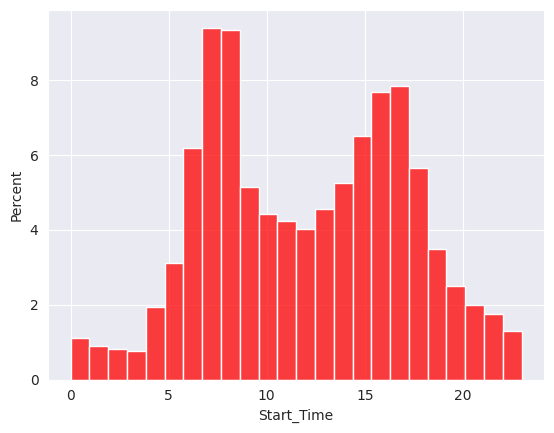

In [36]:
tuesdays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 1]
sns.histplot(tuesdays_start_time.dt.hour, color='red', bins=24, stat='percent');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


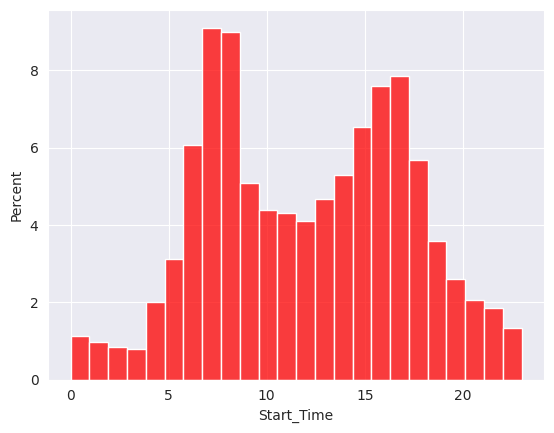

In [37]:
wednesdays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 2]
sns.histplot(wednesdays_start_time.dt.hour, color='red', bins=24, stat='percent');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


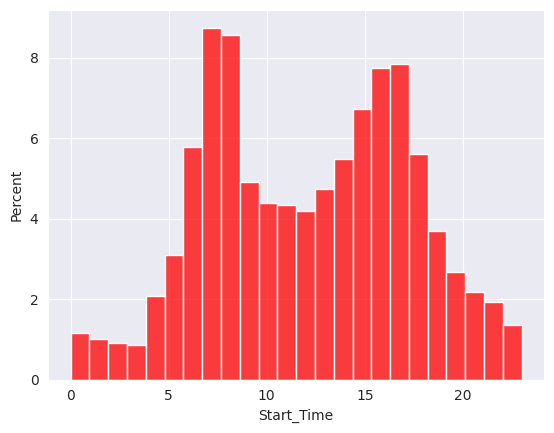

In [38]:
thursdays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 3]
sns.histplot(thursdays_start_time.dt.hour, color='red', bins=24, stat='percent');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


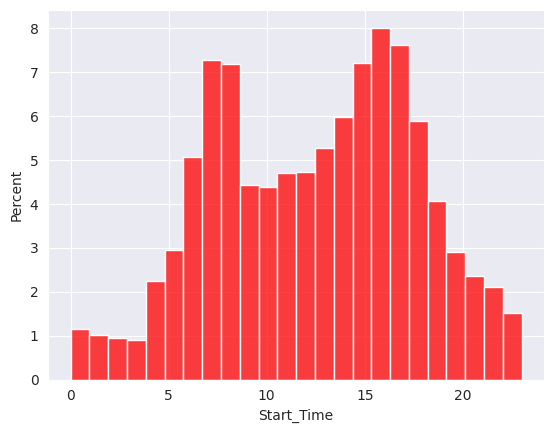

In [39]:
fridays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 4]
sns.histplot(fridays_start_time.dt.hour, color='red', bins=24, stat='percent');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


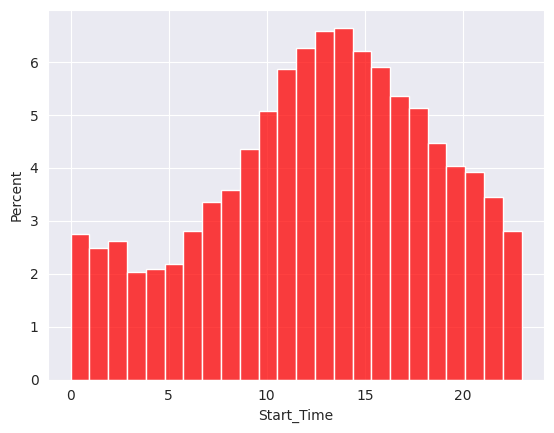

In [40]:
saturdays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 5]
sns.histplot(saturdays_start_time.dt.hour, color='red', bins=24, stat='percent');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


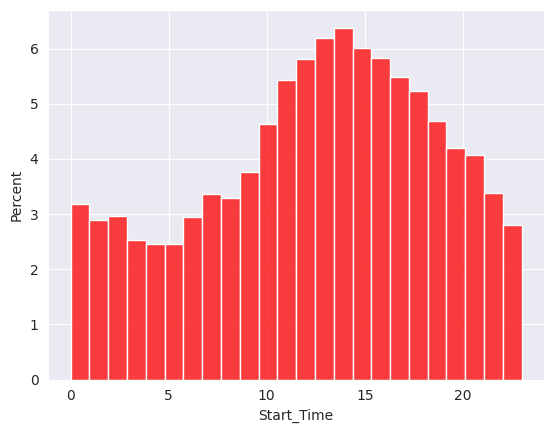

In [41]:
sundays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour, color='red', bins=24, stat='percent');

* On workings i.e. monday, tuesday, wednesday, thurday, friday you'll find almost the same trend in accidents time

* While on saturday and sunday the is a different trend i.e. from 10 am to 7 pm the frequency of accident is more.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


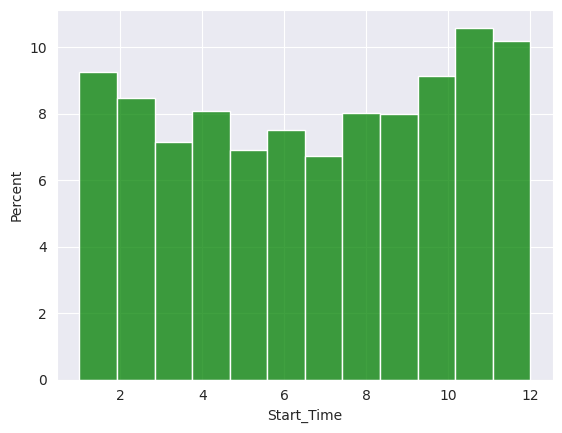

In [42]:
mondays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.month, color='green', bins=12, stat='percent');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


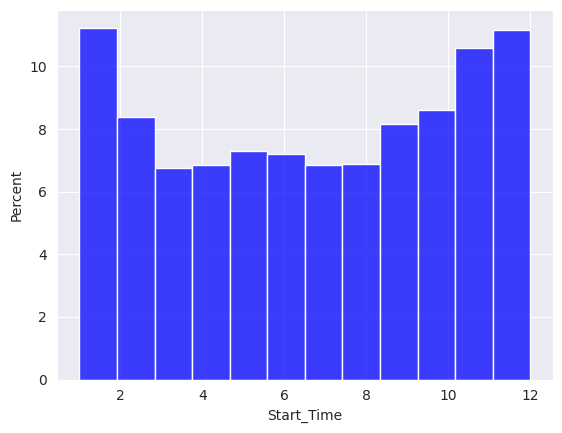

In [43]:
sundays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.month, color='blue', bins=12, stat='percent');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


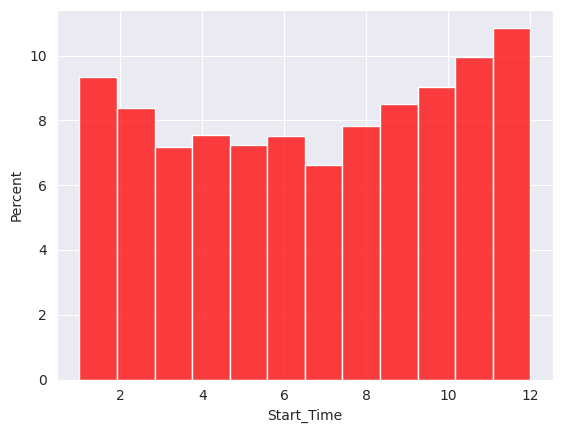

In [44]:
sns.histplot(df['Start_Time'].dt.month, color='red', bins=12, stat='percent');

* It's seems during summer there are less accidents but as the winter starts the is a increasing trend in accidents.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


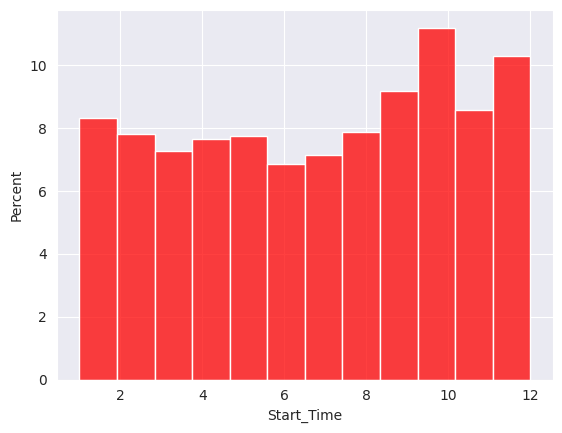

In [45]:
df_2019 = df[df['Start_Time'].dt.year == 2019]
sns.histplot(df_2019['Start_Time'].dt.month, color='red', bins=12, stat='percent');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


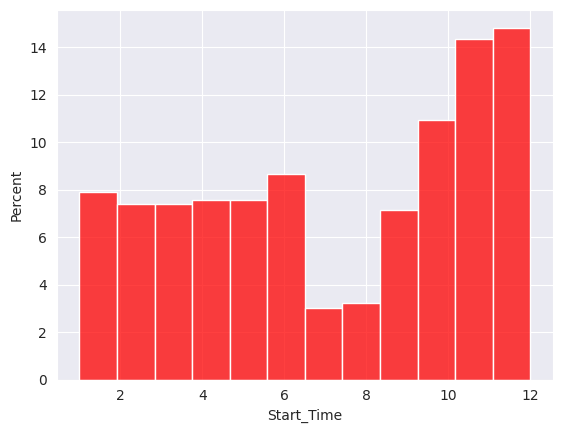

In [46]:
df_2020 = df[df['Start_Time'].dt.year == 2020]
sns.histplot(df_2020['Start_Time'].dt.month, color='red', bins=12, stat='percent');


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


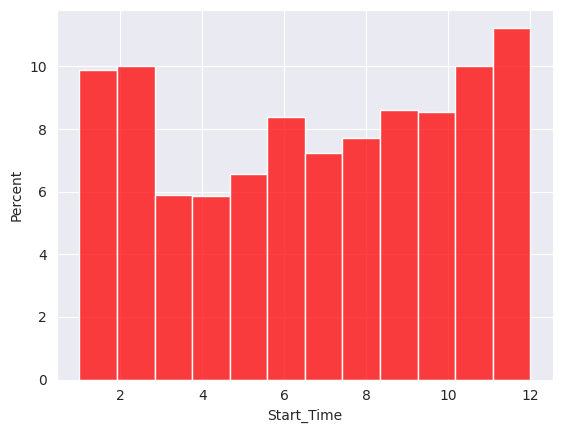

In [47]:
df_2021 = df[df['Start_Time'].dt.year == 2021]
sns.histplot(df_2021['Start_Time'].dt.month, color='red', bins=12, stat='percent');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


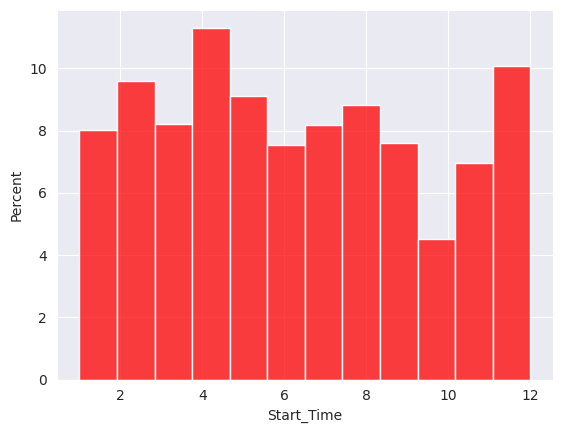

In [48]:
df_2022 = df[df['Start_Time'].dt.year == 2022]
sns.histplot(df_2022['Start_Time'].dt.month, color='red', bins=12, stat='percent');

**3.Weather Details**

What is the weather case that correspondes to the maximum number of accidents?

Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Rain                  84331
Haze                  76223
Fair / Windy          35671
Heavy Rain            32309
Light Drizzle         22684
Name: Weather_Condition, dtype: int64


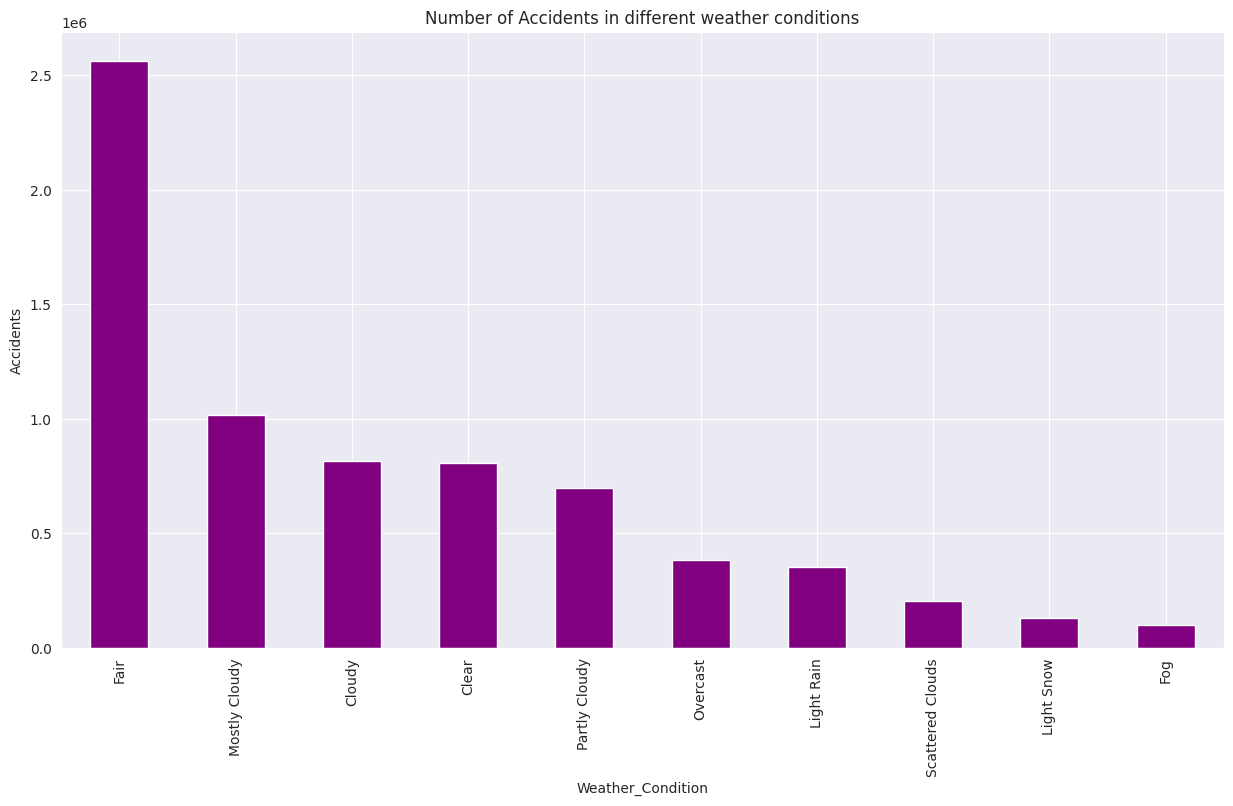

In [49]:
dfwe= df.groupby(['Weather_Condition'])['Weather_Condition'].count().sort_values(ascending=False)
print(dfwe.head(15))
dfwe2=dfwe.iloc[:10]
plt.figure(figsize=(15,8))
dfwe2.plot(kind='bar',color='purple')
plt.ylabel('Accidents')
plt.title("Number of Accidents in different weather conditions")
plt.show()

* Maximum number of accidents occur when the weather is fair. Consequently, the weather condition is not a vital factor for car accidents, it has an effect but not strong.

In [50]:
fig = px.scatter(random_sample , x = 'Severity' ,y = 'Weather_Condition')
fig.show()

* Most of the first degree of severity happens when the weather was partly cloudy, fog, rain, fair,windy, heavy snow,and mist.

<Axes: xlabel='Severity', ylabel='Temperature_F'>

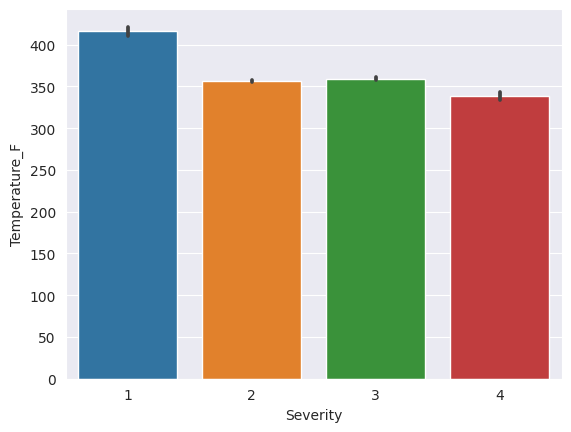

In [51]:
sns.barplot(x='Severity', y='Temperature_F', data=random_sample, palette='tab10')

* We can notice that,The higher the temperature, the higher the severity degree.

<Axes: xlabel='Severity', ylabel='Wind_Speed_mph'>

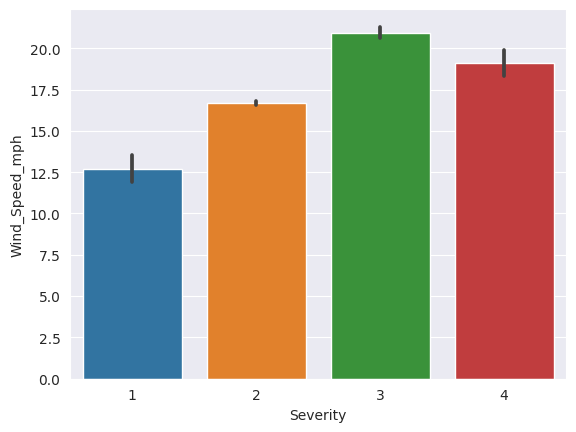

In [52]:
sns.barplot(x='Severity', y='Wind_Speed_mph', data=random_sample, palette='tab10')

* I think wind speed is not important factor for severity degree. It has an effect but not strong effect.


 Describe the different factors of weather accurording to every state?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



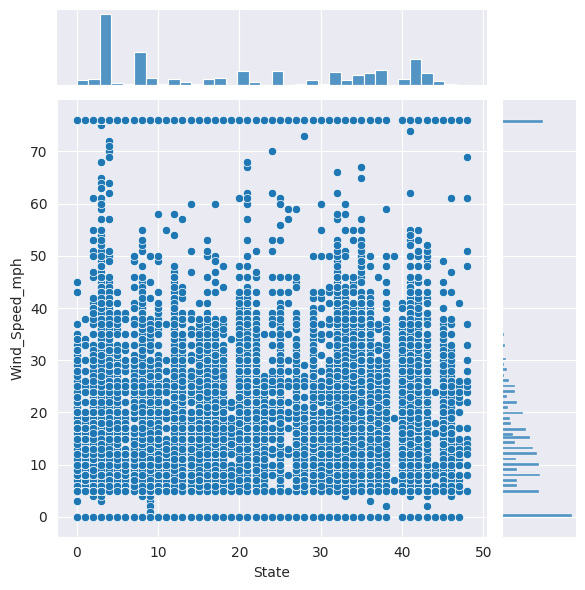

In [53]:
#state with Wind_Speed_mph 
sns.jointplot(x=random_sample["State"], y=random_sample["Wind_Speed_mph"], kind='scatter')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



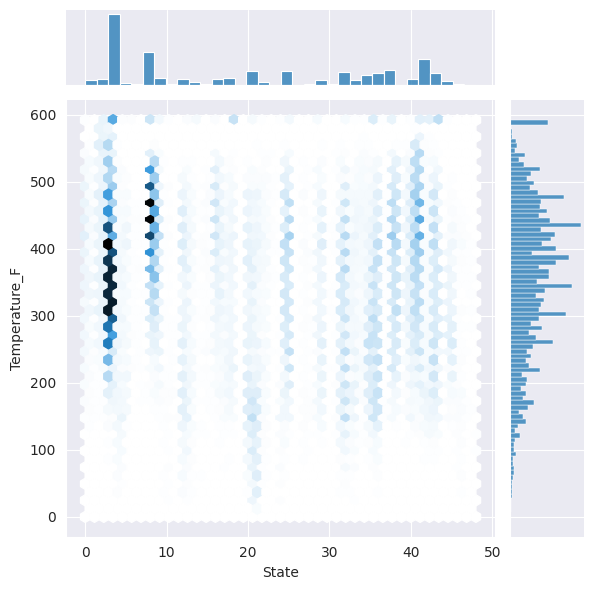

In [54]:
sns.jointplot(x=random_sample["State"], y=random_sample["Temperature_F"], kind='hex')
plt.show()

* States with index from 0 to 10 have increasing at temperature. and this may causes increasing at the rate of accidents.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



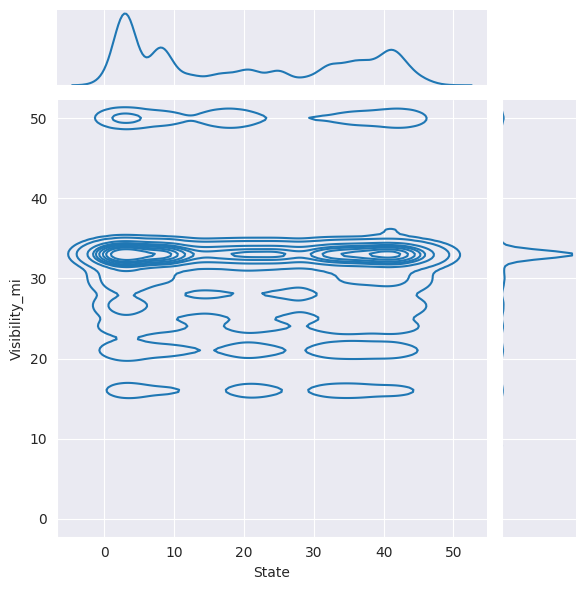

In [55]:
sns.jointplot(x=random_sample["State"], y=random_sample["Visibility_mi"], kind='kde')
plt.show()

* As we can see, almost all states have visibility reaches to 30 miles. Most states with this visibility are from index 0 to 10 and 30 to 50.
* Describe the effect of visibility of severity on each state?

In [56]:
data_sever = df.sample(n=10000)[['Start_Lng','Start_Lat','City','Visibility(mi)','Severity','State']]
data_sever.dropna(inplace=True)

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = data_sever['Start_Lng'],
        lat = data_sever['Start_Lat'],
        text = data_sever['State'],
        mode = 'markers',
        marker = dict(
            size = data_sever['Visibility(mi)'],
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Greens',
            cmin = data_sever['Severity'].max(),
            color = data_sever['Severity'],
            cmax = 1,
            colorbar_title="Severity"
        )))

fig.update_layout(
        title = 'Severity & Visibility of accidents',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
fig.show()

**4.Road Details**

* Which is road features that corresponds to the maximum number of accidents?


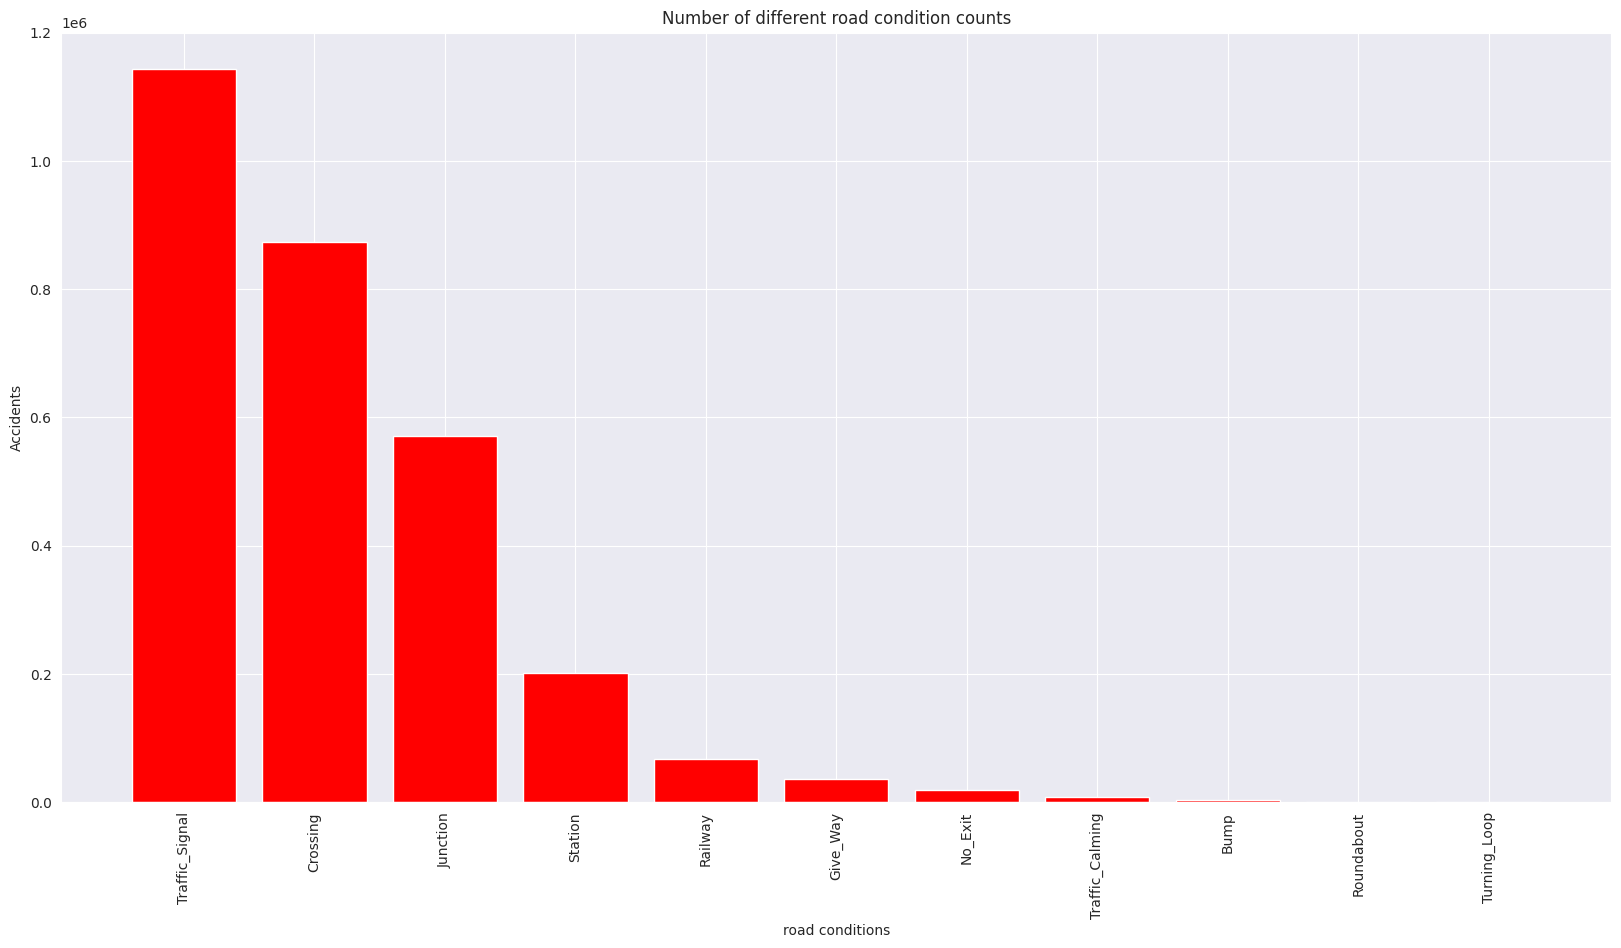

In [57]:
# Count the number of 'true' values in each column
columns = ['Crossing', 'Bump', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
           'Station', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
true_counts = []
for column in columns:
    true_count = df[column].value_counts().get(True, 0)
    true_counts.append(true_count)

    # Sort the counts in descending order
sorted_counts = sorted(true_counts, reverse=True)
sorted_columns = [column for _, column in sorted(zip(true_counts, columns), reverse=True)]

# Create a bar chart
plt.figure(figsize=(20, 10))
plt.bar(sorted_columns, sorted_counts,color='red')
plt.xlabel('road conditions')
plt.ylabel('Accidents')
plt.title("Number of different road condition counts")
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: xlabel='Traffic_Calming', ylabel='Severity'>

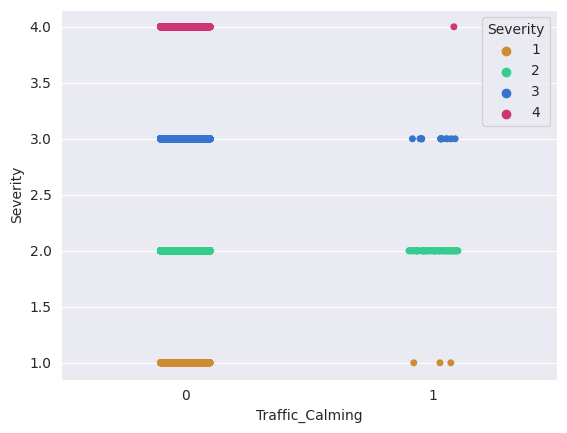

In [58]:
severity_colors = ["#cd8d35", "#35cd8d", "#3575cd","#cd3575"]
sns.stripplot(x="Traffic_Calming", y="Severity", hue="Severity", data=random_sample,palette=severity_colors)

<Axes: xlabel='Junction', ylabel='Severity'>

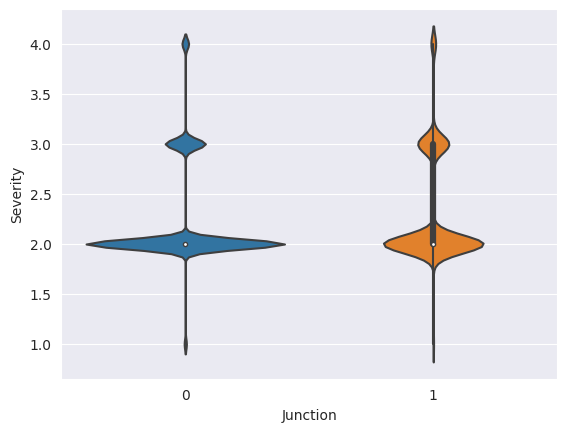

In [59]:
sns.violinplot(x="Junction", y="Severity", data=random_sample)

* From the violinplot, we got that there is an increase in severity from second degree if there is no junction in the street.


**Conclusion**


**Firstly, we encoded some of the columns that we will work with as some charts and plots don't accept the categorical columns. After that, we extracted some additional data from the start time column such as year, month, day, and hour for doing some analysis and visualization on them. Finally, we started to analyze the dataset using different plots like scatterplots, pie charts, bar plots, kde plots, join plots, and violin plots. After the analysis we got some points, the top state with the highest number of accidents is California, the top city with the highest number of accidents is Miami, 2022 was the year with the maximum number of accidents, the rate of accidents increased at the work days like Friday, Thursday, and Wednesday, 7 am and 4 pm are the times with highest rate of accidents, and traffic signal road is most road condition corresponds to highest number of accidents.**